In [1]:
from scipy import stats
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [10,5]
plt.rcParams["figure.dpi"] = 300
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [7]:
df=pd.read_csv(r"C:\Users\Administrator\Downloads\bank-full.csv", sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [8]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [4]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [9]:
bank1=pd.get_dummies(df,columns=['job','marital','default','housing','loan','education','contact','poutcome','month'])
bank1['y']=bank1['y'].replace('yes',1)
bank1['y']=bank1['y'].replace('no',0)
bank1

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,2143,5,261,1,-1,0,0,False,False,...,False,False,False,False,False,False,True,False,False,False
1,44,29,5,151,1,-1,0,0,False,False,...,False,False,False,False,False,False,True,False,False,False
2,33,2,5,76,1,-1,0,0,False,False,...,False,False,False,False,False,False,True,False,False,False
3,47,1506,5,92,1,-1,0,0,False,True,...,False,False,False,False,False,False,True,False,False,False
4,33,1,5,198,1,-1,0,0,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,1,False,False,...,False,False,False,False,False,False,False,True,False,False
45207,71,1729,17,456,2,-1,0,1,False,False,...,False,False,False,False,False,False,False,True,False,False
45208,72,5715,17,1127,5,184,3,1,False,False,...,False,False,False,False,False,False,False,True,False,False
45209,57,668,17,508,4,-1,0,0,False,True,...,False,False,False,False,False,False,False,True,False,False


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x=pd.concat([bank1.iloc[:,0:7],bank1.iloc[:,8:]],axis=1)
y=bank1.iloc[:,7]

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [14]:
from sklearn.linear_model import LogisticRegression

In [41]:
model=LogisticRegression()
model.fit(x_train,y_train)
model.coef_

array([[-2.82115171e-02,  2.50677377e-05, -7.76812715e-03,
         4.00277441e-03, -3.29605544e-01,  3.31454131e-03,
        -1.64903442e-01, -2.64381569e-02, -2.35138965e-01,
        -2.18621301e-02, -8.72842243e-03, -1.27444796e-03,
         1.55564327e-01, -1.49596185e-02, -8.58603568e-02,
         2.49895238e-02, -6.16734275e-02,  4.87359048e-03,
         4.73568452e-03,  2.13234086e-02, -1.65397722e-01,
        -1.21698085e-01, -2.48241237e-01, -1.75311615e-02,
         3.42683480e-01, -6.08455879e-01, -7.28923946e-02,
        -1.92880004e-01, -7.42048752e-02, -2.46871939e-01,
         4.23675958e-02,  1.29368192e-02,  9.30392684e-02,
         4.57810888e-02, -4.04592756e-01, -1.29685545e-01,
        -3.19960542e-02,  3.05169861e-01, -4.09260661e-01,
         5.06750580e-02,  1.75380217e-02,  2.46754803e-02,
        -4.88842955e-03, -1.41286821e-02, -8.21103971e-02,
        -5.66614985e-02,  8.31439733e-02, -3.86053078e-01,
        -5.43835933e-02,  9.25704368e-02,  6.38503099e-0

In [42]:
x_test

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
22589,54,2762,22,309,7,-1,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
16975,39,1492,25,1106,1,-1,0,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4954,37,13156,21,240,1,-1,0,False,True,False,...,False,False,False,False,False,False,True,False,False,False
43743,38,4321,18,252,1,85,6,False,True,False,...,False,False,False,False,False,False,True,False,False,False
26653,35,3888,20,207,5,178,5,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22339,46,532,22,491,2,-1,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5401,36,1109,23,122,5,-1,0,False,False,False,...,False,False,False,False,False,False,True,False,False,False
971,33,0,7,432,1,-1,0,False,False,False,...,False,False,False,False,False,False,True,False,False,False
7623,45,130,30,127,1,-1,0,False,True,False,...,False,False,False,False,False,False,True,False,False,False


In [45]:
y_pred = model.predict(x_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [46]:
print(y_test[:25])
print(y_pred[:25])

22589    0
16975    0
4954     0
43743    0
26653    0
39864    0
22157    0
30533    1
10905    0
36747    0
6592     0
33177    0
18337    0
38328    0
11861    0
37530    0
25705    0
35587    0
23259    0
27011    0
2907     0
35306    1
9856     0
25708    0
2161     0
Name: y, dtype: int64
[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [17]:
model.score(x_train,y_train)

0.8896720537926153

In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [20]:
cm = confusion_matrix(y,pred)
cm

array([[39076,   846],
       [ 4069,  1220]], dtype=int64)

<Axes: >

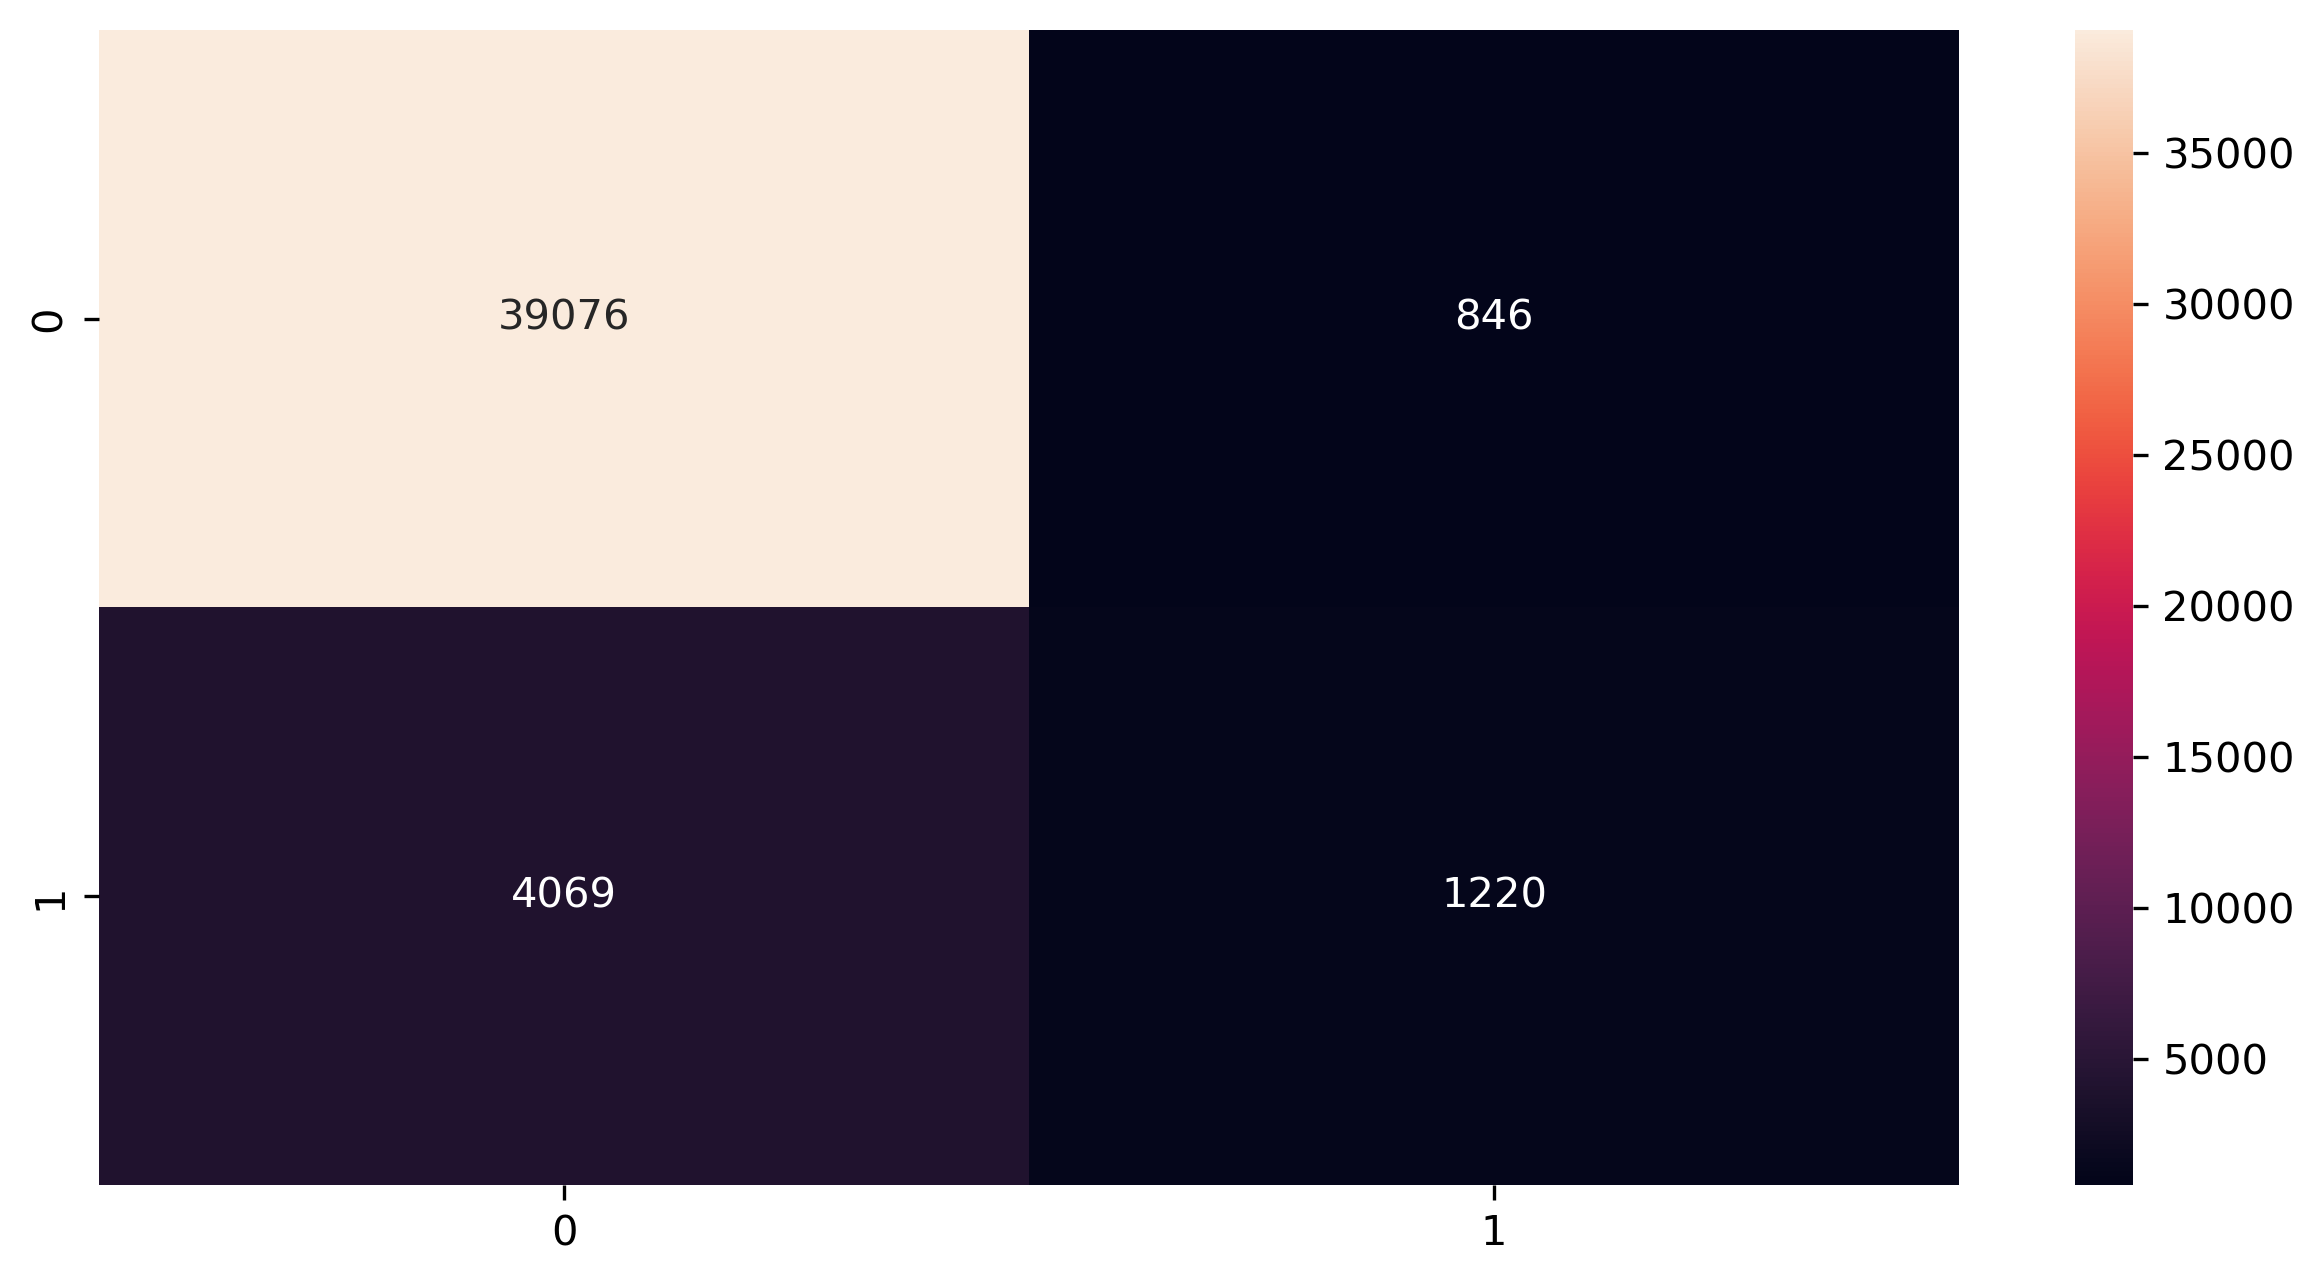

In [21]:
sns.heatmap(confusion_matrix(y,pred), annot=True, fmt='g')

In [47]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     10067
           1       0.56      0.23      0.33      1236

    accuracy                           0.90     11303
   macro avg       0.74      0.61      0.64     11303
weighted avg       0.87      0.90      0.88     11303



In [49]:
proba = model.predict_proba(x_test)[:,1]
proba

array([0.0302206 , 0.75126632, 0.03738322, ..., 0.07883179, 0.0125354 ,
       0.03832211])

In [26]:
df1=pd.DataFrame({'actual':y,'prediction':pred})
df1

,actual,prediction
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,0
45208,1,1
45209,0,0


In [39]:
proba = model.predict_proba(x)[:,1]
proba

array([0.03139544, 0.02117628, 0.01892985, ..., 0.69020982, 0.08938012,
       0.10172962])

In [55]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

In [50]:
auc = roc_auc_score(y_test,proba)
auc

0.8411906408294202

In [51]:
fpr,tpr,threshold = roc_curve(y_test,proba)

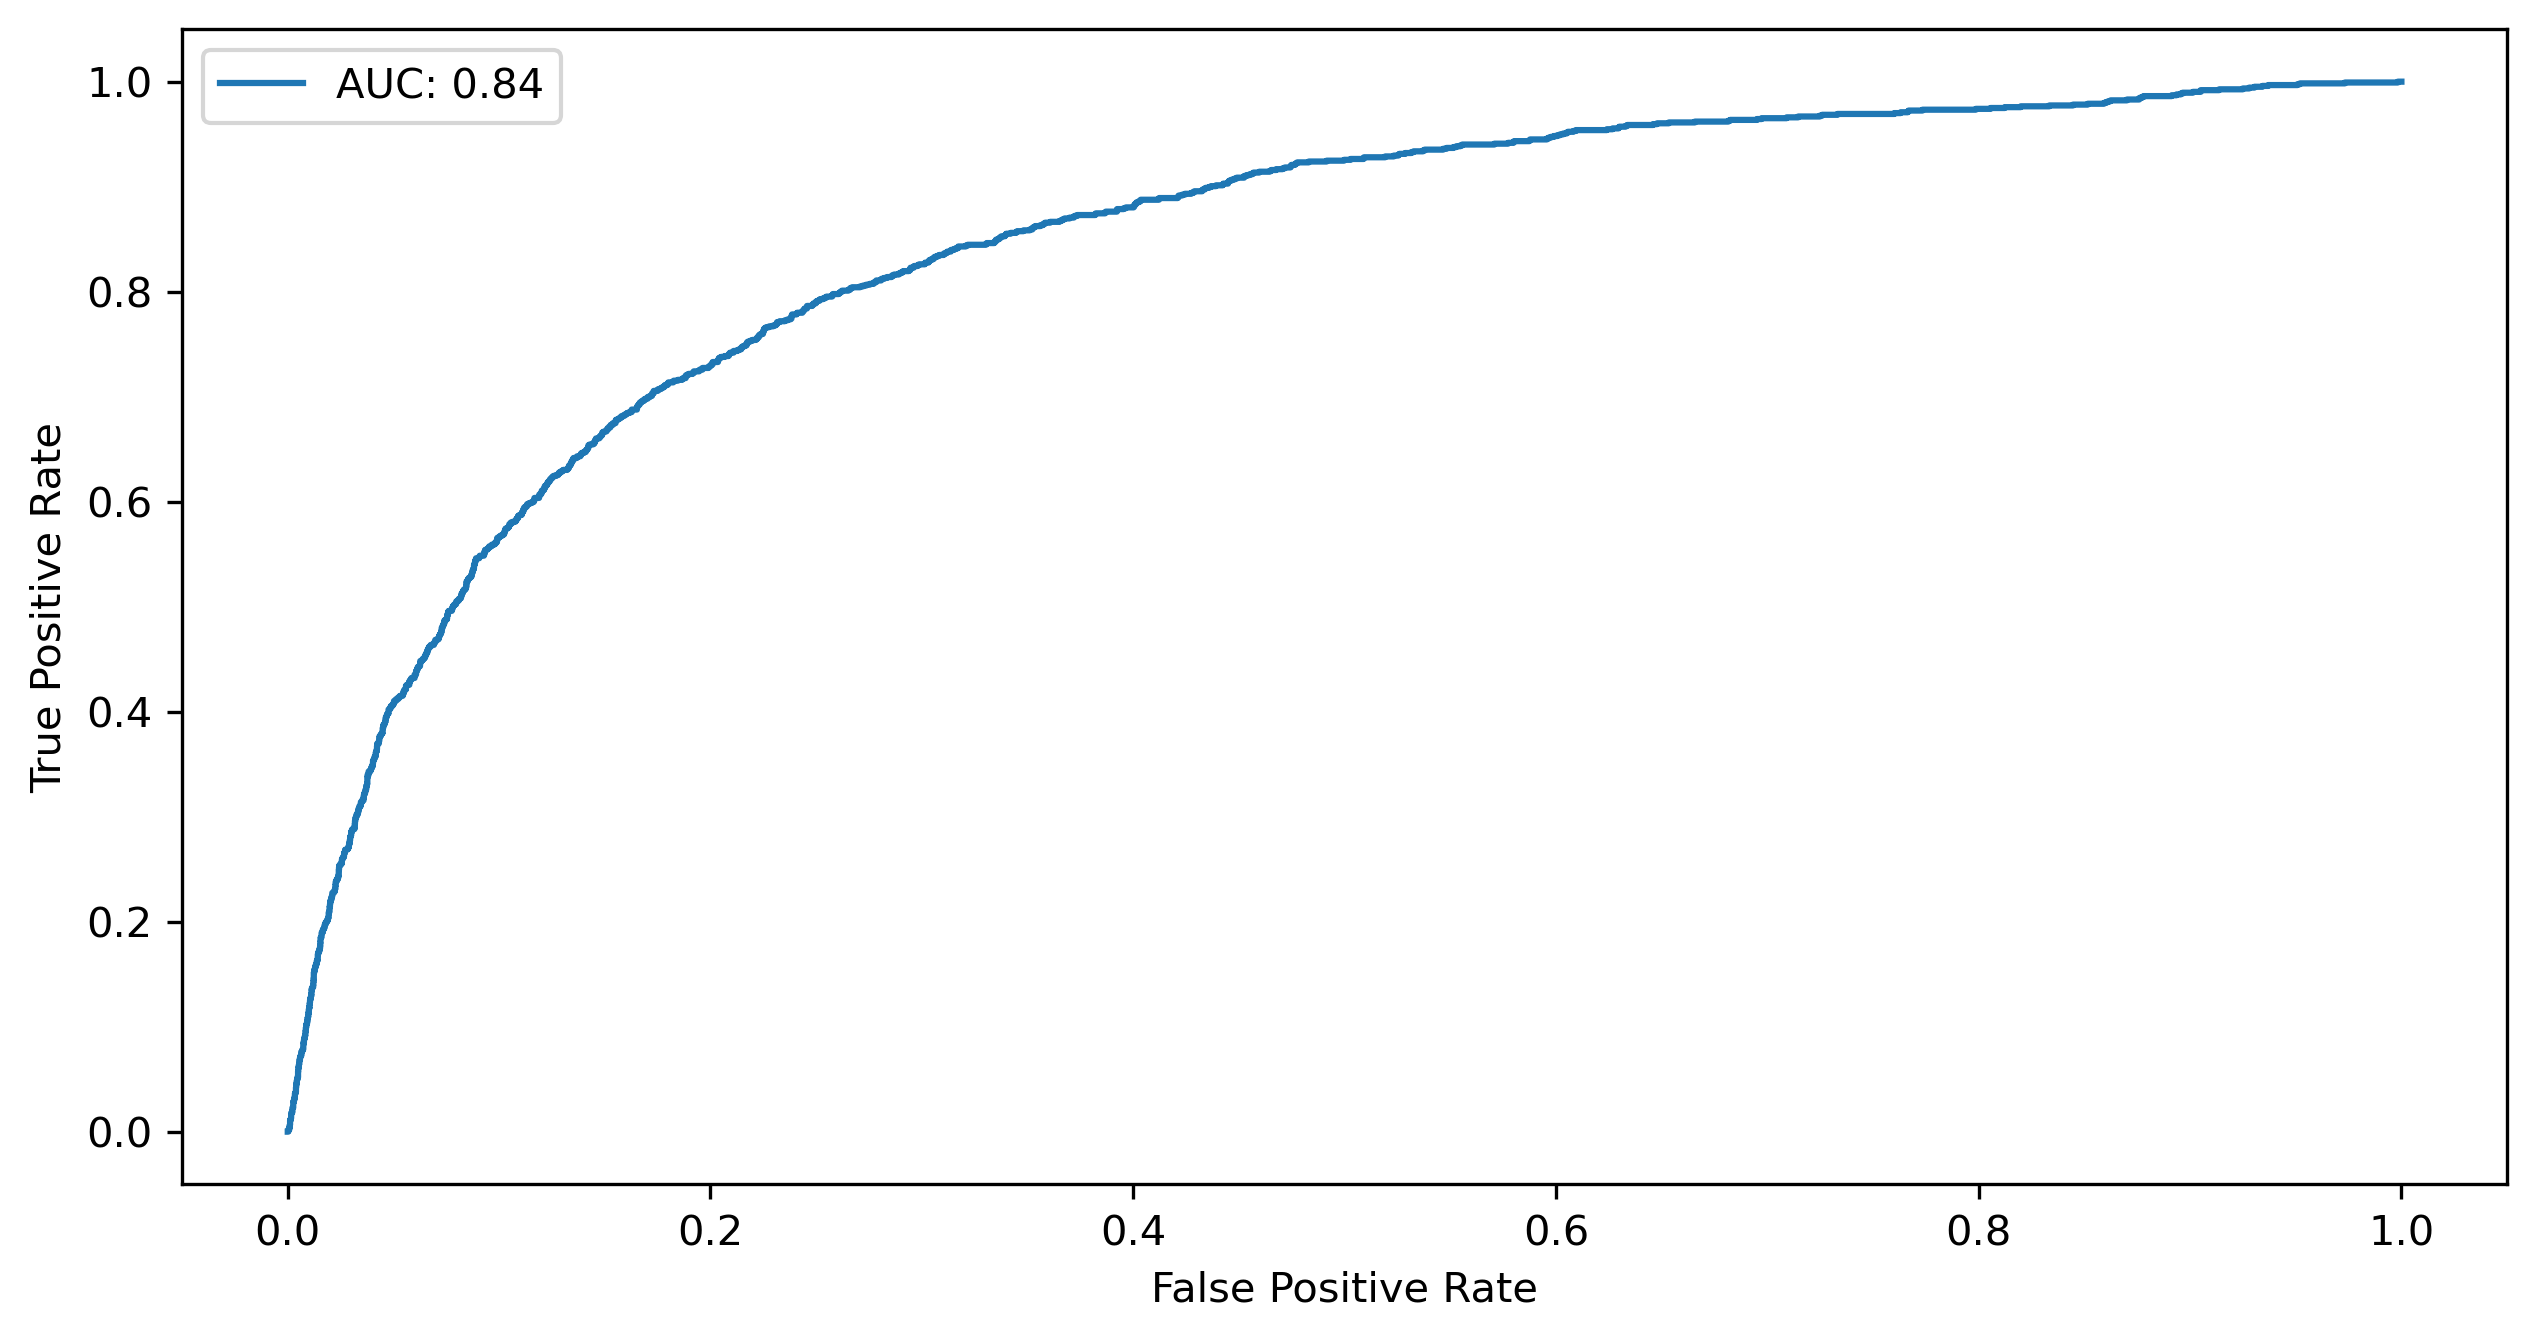

In [52]:
plt.plot(fpr,tpr,label = 'AUC: %0.2f'%auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [56]:
accuracy = []

for i in threshold:
    ypred = np.where(proba>i,1,0)
    accuracy.append(accuracy_score(y_test,y_pred))

In [57]:
threshold_selection = pd.DataFrame({'Threshold' : threshold, 'Accuracy' : accuracy})

In [58]:
threshold_selection

,Threshold,Accuracy
0,inf,0.896134
1,9.999820e-01,0.896134
2,9.999803e-01,0.896134
3,9.998091e-01,0.896134
4,9.993339e-01,0.896134
...,...,...
1708,1.841649e-03,0.896134
1709,1.831064e-03,0.896134
1710,6.280239e-06,0.896134
1711,5.464695e-06,0.896134


In [59]:
threshold_selection.sort_values(by = 'Accuracy',ascending=False)

,Threshold,Accuracy
0,inf,0.896134
1151,1.226549e-01,0.896134
1149,1.227676e-01,0.896134
1148,1.227951e-01,0.896134
1147,1.230779e-01,0.896134
...,...,...
568,2.810713e-01,0.896134
567,2.823810e-01,0.896134
566,2.824640e-01,0.896134
565,2.834588e-01,0.896134


In [60]:
from sklearn.preprocessing import binarize

In [61]:
proba

array([0.0302206 , 0.75126632, 0.03738322, ..., 0.07883179, 0.0125354 ,
       0.03832211])

In [62]:
new_pred = binarize([proba], threshold=1.226549e-01)[0]

In [63]:
new_pred

array([0., 1., 0., ..., 0., 0., 0.])

In [65]:
print(classification_report(y_test,new_pred))

              precision    recall  f1-score   support

           0       0.96      0.78      0.86     10067
           1       0.29      0.76      0.42      1236

    accuracy                           0.77     11303
   macro avg       0.63      0.77      0.64     11303
weighted avg       0.89      0.77      0.81     11303

